In [454]:
import pandas as pd

In [455]:
import numpy as np

In [456]:
from darts import TimeSeries
from darts.models import ExponentialSmoothing

In [457]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [458]:
import matplotlib.pyplot as plt

In [459]:
import matplotlib.ticker as ticker

In [460]:
import datetime as dt

In [529]:
data = pd.read_csv("gemini_BTCUSD_day.csv")
data.index = data.index[::-1]
data = data.reindex(index=data.index[::-1])

In [530]:
data.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1.444277e+09,08/10/2015 04:00,BTCUSD,0.00,245.00,0.00,243.60,34.754703
1,1.444363e+09,09/10/2015 04:00,BTCUSD,243.60,249.97,243.60,245.51,61.587068
2,1.444450e+09,10/10/2015 04:00,BTCUSD,245.51,246.30,244.60,246.30,30.870549
3,1.444536e+09,11/10/2015 04:00,BTCUSD,246.30,249.50,245.96,248.98,22.747091
4,1.444622e+09,12/10/2015 04:00,BTCUSD,248.98,248.98,245.75,245.75,71.047743


In [531]:
data.tail()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
2289,1.642050e+12,13/01/2022 04:00,BTCUSD,43525.85,44443.94,42326.63,42679.68,1120.790154
2290,1.642130e+12,14/01/2022 04:00,BTCUSD,42679.68,43462.53,41789.82,42947.72,800.802511
2291,1.642220e+12,15/01/2022 04:00,BTCUSD,42947.72,43811.44,42590.52,43022.38,850.111677
2292,1.642310e+12,16/01/2022 04:00,BTCUSD,43022.38,43499.99,42583.00,42655.12,622.078099
2293,1.642390e+12,17/01/2022 04:00,BTCUSD,42655.12,42976.61,41559.11,42236.96,556.178715


In [532]:
data_close = data['Close']

In [533]:
data_close = data_close.values.reshape(len(data_close), 1)

In [534]:
data_date = [None] * len(data['Date'])
for index, i in enumerate(data['Date']):
   data_date[index] = i[6:10] + i[3:5] + i[0:2]

In [535]:
data_date

['20151008',
 '20151009',
 '20151010',
 '20151011',
 '20151012',
 '20151013',
 '20151014',
 '20151015',
 '20151016',
 '20151017',
 '20151018',
 '20151019',
 '20151020',
 '20151021',
 '20151022',
 '20151023',
 '20151024',
 '20151025',
 '20151026',
 '20151027',
 '20151028',
 '20151029',
 '20151030',
 '20151031',
 '20151101',
 '20151102',
 '20151103',
 '20151104',
 '20151105',
 '20151106',
 '20151107',
 '20151108',
 '20151109',
 '20151110',
 '20151111',
 '20151112',
 '20151113',
 '20151114',
 '20151115',
 '20151116',
 '20151117',
 '20151118',
 '20151119',
 '20151120',
 '20151121',
 '20151122',
 '20151123',
 '20151124',
 '20151125',
 '20151126',
 '20151127',
 '20151128',
 '20151129',
 '20151130',
 '20151201',
 '20151202',
 '20151203',
 '20151204',
 '20151205',
 '20151206',
 '20151207',
 '20151208',
 '20151209',
 '20151210',
 '20151211',
 '20151212',
 '20151213',
 '20151214',
 '20151215',
 '20151216',
 '20151217',
 '20151218',
 '20151219',
 '20151220',
 '20151221',
 '20151222',
 '20151223',

In [536]:
ticker_spacing = data_date
ticker_spacing = 90 # 3 month

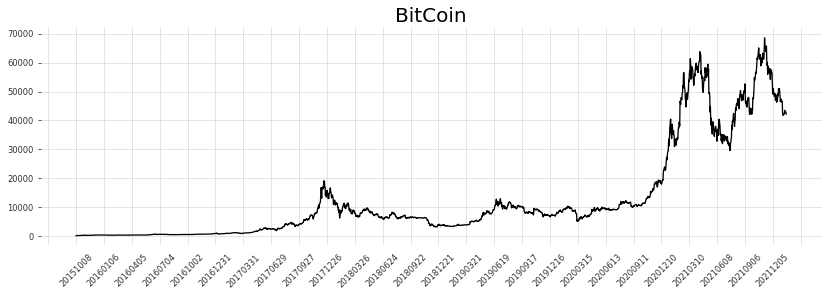

In [537]:
fig, ax = plt.subplots(1,1)
ax.plot(data_date,data_close)
ax.xaxis.set_major_locator(ticker.MultipleLocator(ticker_spacing))
plt.rcParams["figure.figsize"] = (14,4)
plt.xticks(rotation = 45)
plt.title("BitCoin", fontsize=20)
plt.show()

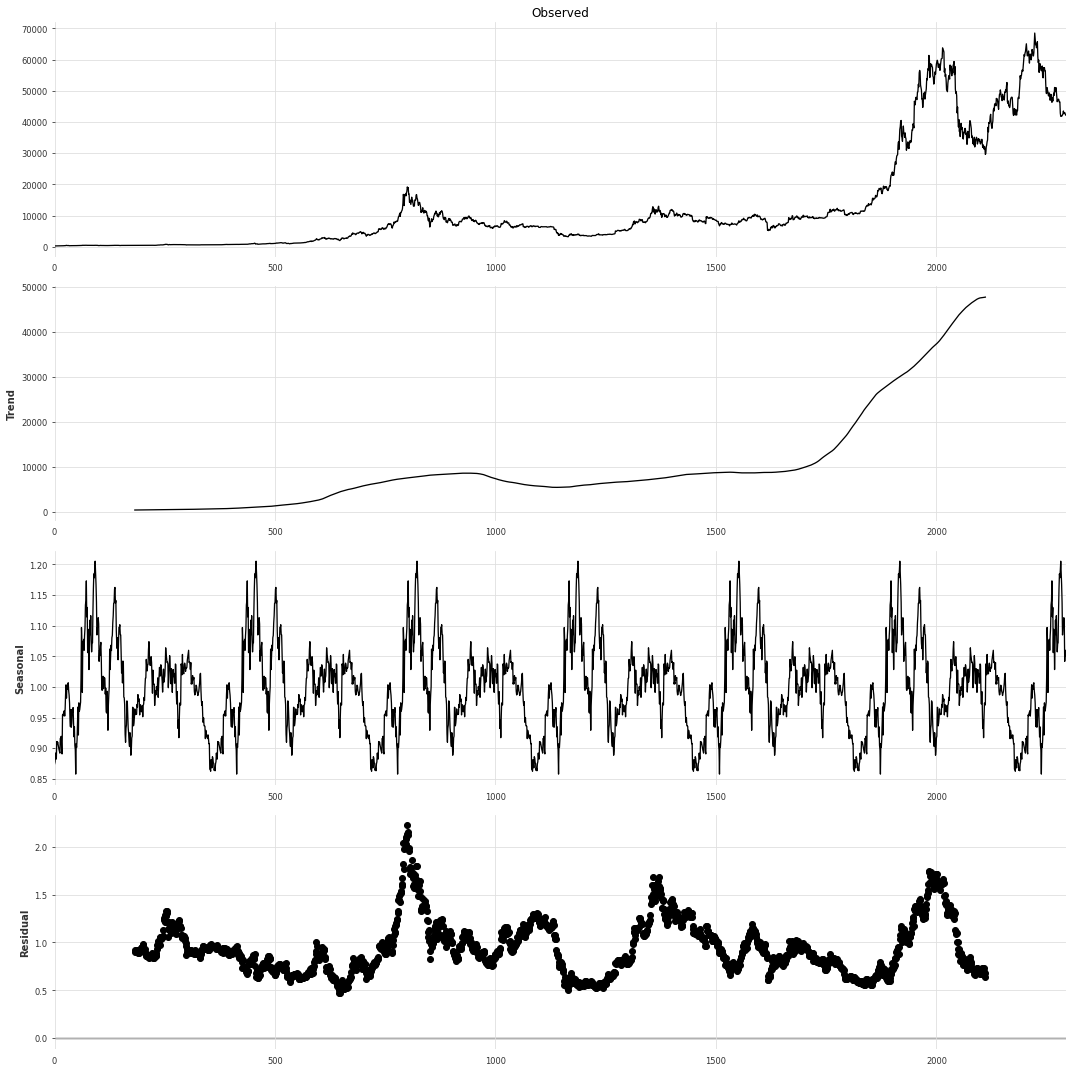

In [569]:
# multiplicative Decomposition: yt = St x Tt x Et*
forecast = seasonal_decompose(data['Close'].values, 'multiplicative', period=365)
plt.rcParams.update({'figure.figsize': (15,15)})
forecast.plot()
plt.show()

In [539]:
data['Date'] = data_date

In [540]:
data['Date']

0       20151008
1       20151009
2       20151010
3       20151011
4       20151012
          ...   
2289    20220113
2290    20220114
2291    20220115
2292    20220116
2293    20220117
Name: Date, Length: 2294, dtype: object

/home/chiieongng/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


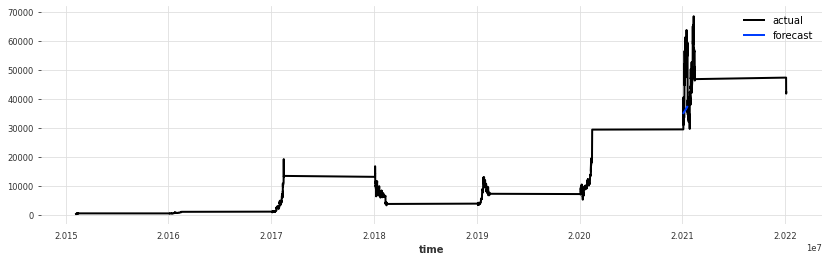

<Figure size 1008x288 with 0 Axes>

In [565]:
series = TimeSeries.from_dataframe(data,'Date','Close')
#train, val = series[:-365], series[-365:]
train, val = series.split_before(len(data) - 365)
model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))
series.plot(label='actual')
prediction.plot(label='forecast')
plt.rcParams["figure.figsize"] = (14,4)
plt.legend()
plt.figure()
plt.show()

In [605]:
df = pd.read_csv("gemini_BTCUSD_day.csv", index_col='Date', parse_dates=['Date'], usecols = ['Date','Close'])

In [606]:
df = df[::-1]

In [614]:
df['Close']

Date
2015-08-10 04:00:00      243.60
2015-09-10 04:00:00      245.51
2015-10-10 04:00:00      246.30
2015-11-10 04:00:00      248.98
2015-12-10 04:00:00      245.75
                         ...   
2022-01-13 04:00:00    42679.68
2022-01-14 04:00:00    42947.72
2022-01-15 04:00:00    43022.38
2022-01-16 04:00:00    42655.12
2022-01-17 04:00:00    42236.96
Name: Close, Length: 2294, dtype: float64

In [608]:
print(df)

                        Close
Date                         
2015-08-10 04:00:00    243.60
2015-09-10 04:00:00    245.51
2015-10-10 04:00:00    246.30
2015-11-10 04:00:00    248.98
2015-12-10 04:00:00    245.75
...                       ...
2022-01-13 04:00:00  42679.68
2022-01-14 04:00:00  42947.72
2022-01-15 04:00:00  43022.38
2022-01-16 04:00:00  42655.12
2022-01-17 04:00:00  42236.96

[2294 rows x 1 columns]


In [609]:
print(df.squeeze)

<bound method NDFrame.squeeze of                         Close
Date                         
2015-08-10 04:00:00    243.60
2015-09-10 04:00:00    245.51
2015-10-10 04:00:00    246.30
2015-11-10 04:00:00    248.98
2015-12-10 04:00:00    245.75
...                       ...
2022-01-13 04:00:00  42679.68
2022-01-14 04:00:00  42947.72
2022-01-15 04:00:00  43022.38
2022-01-16 04:00:00  42655.12
2022-01-17 04:00:00  42236.96

[2294 rows x 1 columns]>


In [611]:
price = df.squeeze()
price.head()

Date
2015-08-10 04:00:00    243.60
2015-09-10 04:00:00    245.51
2015-10-10 04:00:00    246.30
2015-11-10 04:00:00    248.98
2015-12-10 04:00:00    245.75
Name: Close, dtype: float64